# 위키피디아

In [14]:
import pandas as pd

wiki = pd.read_json('/data/ephemeral/home/sungeun/level2-mrc-nlp-13/code/data/wikipedia_documents.json',orient='index')
wiki_df = pd.DataFrame(wiki)
print(wiki_df.head())

                                                text corpus_source   url  \
0  이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...         위키피디아  TODO   
1  이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...         위키피디아  TODO   
2  현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...         위키피디아  TODO   
3  아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...         위키피디아  TODO   
4  저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...         위키피디아  TODO   

   domain    title  author  html  document_id  
0     NaN    나라 목록     NaN   NaN            0  
1     NaN    나라 목록     NaN   NaN            1  
2     NaN      백남준     NaN   NaN            2  
3     NaN  아오조라 문고     NaN   NaN            3  
4     NaN  아오조라 문고     NaN   NaN            4  


# train, valid data

## notice
- train 3952개
- valid 240개

In [4]:
from datasets import load_from_disk, load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from tqdm import tqdm

import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
mrc_datasets = load_from_disk('/data/ephemeral/home/sungeun/level2-mrc-nlp-13/data/train_dataset')

mrc_train_dataset = mrc_datasets['train']
mrc_valid_dataset = mrc_datasets['validation']

In [7]:
mrc_train_dataset[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [8]:
mrc_valid_dataset[0]

{'title': '전효숙',
 'context': '순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법시험에 합격하여 판사로 임용되었고 대법원 재판연구관, 수원지법 부장판사, 사법연수원 교수, 특허법원 부장판사 등을 거쳐 능력을 인정받았다. 2003년 최종영 대법원장의 지명으로 헌법재판소 재판관을 역임하였다.\\n\\n경제민주화위원회(위원장 장하성이 소액주주들을 대표해 한보철강 부실대출에 책임이 있는 이철수 전 제일은행장 등 임원 4명을 상대로 제기한 손해배상청구소송에서 서울지방법원 민사합의17부는 1998년 7월 24일에 "한보철강에 부실 대출하여 은행에 막대한 손해를 끼친 점이 인정된다"며 "원고가 배상을 청구한 400억원 전액을 은행에 배상하라"고 하면서 부실 경영인에 대한 최초의 배상 판결을 했다. \\n\\n2004년 10월 신행정수도의건설을위한특별조치법 위헌 확인 소송에서 9인의 재판관 중 유일하게 각하 견해를 내었다. 소수의견에서 전효숙 재판관은 다수견해의 문제점을 지적하면서 관습헌법 법리를 부정하였다. 전효숙 재판관은 서울대학교 근대법학교육 백주년 기념관에서 열린 강연에서, 국회가 고도의 정치적인 사안을 정치로 풀기보다는 헌법재판소에 무조건 맡겨서 해결하려는 자세는 헌법재판소에게 부담스럽다며 소회를 밝힌 바 있다.',
 'question': '처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?',
 'id': 'mrc-0-003264',
 'answers': {'answer_start': [284], 'text': ['한보철강']},
 'document_id': 9027,
 '__index_level_0__': 2146}

## dataframe

### train data

In [9]:
_id = [] 
doc_id = []
title = []
context = []
question = []
answer = []
answer_start = []
answer_len = []
question_len = []
context_len = []

for train_data in mrc_train_dataset:
    _id.append(train_data['id'])
    doc_id.append(train_data['document_id'])
    title.append(train_data['title'])
    context.append(train_data['context'])
    question.append(train_data['question'])
    answer.append(train_data['answers']['text'][0])
    context_len.append(len(train_data['context']))
    question_len.append(len(train_data['question']))
    #answer_len.append(answer_len_f(train_data['answers']['text']))
    answer_len.append(len(train_data['answers']['text'][0]))
    answer_start.append(train_data['answers']['answer_start'][0])
    
train_dict = {
    "id":_id,
    "doc_id":doc_id,
    "title":title,
    "context":context,
    "question":question,
    "answer":answer,
    "context_len":context_len,
    "question_len":question_len,
    "answer_len":answer_len,
    "answer_start":answer_start,
}

train_df = pd.DataFrame(train_dict)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3952 non-null   object
 1   doc_id        3952 non-null   int64 
 2   title         3952 non-null   object
 3   context       3952 non-null   object
 4   question      3952 non-null   object
 5   answer        3952 non-null   object
 6   context_len   3952 non-null   int64 
 7   question_len  3952 non-null   int64 
 8   answer_len    3952 non-null   int64 
 9   answer_start  3952 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 308.9+ KB


In [11]:
train_df.head(3)

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start
0,mrc-1-000067,18293,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,하원,862,32,2,235
1,mrc-0-004397,51638,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,《경영의 실제》,621,22,8,212
2,mrc-1-000362,5028,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,백성,850,30,2,510


In [19]:
max_answer_length = train_df['answer_len'].max()  # 가장 긴 answer의 길이 찾기
longest_answer_row = train_df[train_df['answer_len'] == max_answer_length]  # 해당 길이를 가진 행 찾기

longest_answer_row

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start,answer_length
996,mrc-0-002792,5307,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명...",윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?,“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통...,1633,36,83,1122,83


In [20]:
len(train_df) # 3952개

3952

### valid data

In [14]:
_id = []
doc_id = []
title = []
context = []
question = []
answer = []
answer_start = []
answer_len = []
question_len = []
context_len = []

for valid_data in mrc_valid_dataset:
    _id.append(valid_data['id'])
    doc_id.append(valid_data['document_id'])
    title.append(valid_data['title'])
    context.append(valid_data['context'])
    question.append(valid_data['question'])
    answer.append(valid_data['answers']['text'][0])
    context_len.append(len(valid_data['context']))
    question_len.append(len(valid_data['question']))
    #answer_len.append(answer_len_f(valid_data['answers']['text']))
    answer_len.append(len(valid_data['answers']['text'][0]))
    answer_start.append(valid_data['answers']['answer_start'][0])
    
valid_dict = {
    "id":_id,
    "doc_id":doc_id,
    "title":title,
    "context":context,
    "question":question,
    "answer":answer,
    "context_len":context_len,
    "question_len":question_len,
    "answer_len":answer_len,
    "answer_start":answer_start,
}

valid_df = pd.DataFrame(valid_dict)

In [15]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            240 non-null    object
 1   doc_id        240 non-null    int64 
 2   title         240 non-null    object
 3   context       240 non-null    object
 4   question      240 non-null    object
 5   answer        240 non-null    object
 6   context_len   240 non-null    int64 
 7   question_len  240 non-null    int64 
 8   answer_len    240 non-null    int64 
 9   answer_start  240 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 18.9+ KB


In [16]:
valid_df.head(3)

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start
0,mrc-0-003264,9027,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,한보철강,625,30,4,284
1,mrc-0-004762,51765,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,1871년,964,36,5,146
2,mrc-1-001810,15694,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,나뭇잎,611,31,3,517


In [22]:
len(valid_df) # 240개

240

In [17]:
all_df = pd.concat([train_df,valid_df], ignore_index=True)
all_df.tail(3)

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start
4189,mrc-0-003083,5326,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,미나미 지로,1314,27,6,247
4190,mrc-0-002978,48575,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,"200,000명",998,35,8,563
4191,mrc-1-000622,5761,레닌주의,사회주의 혁명은 오로지 선진노동자계급에 기초한 계급투쟁으로서 이루어질 수 있다고 주...,마르크스주의자들의 사상은?,공산주의,967,14,4,811


## doc id가 같은 것끼리 context도 같다.

In [25]:
doc_context_df = all_df[['doc_id','context']]
doc_context_df

,doc_id,context
0,18293,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...
1,51638,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...
2,5028,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...
3,34146,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든..."
4,47334,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...
...,...,...
4187,53265,"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받..."
4188,12190,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...
4189,5326,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...
4190,48575,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...


In [26]:
print(len(doc_context_df[doc_context_df.duplicated(['doc_id'],keep=False)])) # 중복되는 행의 개수가 1336개
print(len(doc_context_df[doc_context_df.duplicated(['context'],keep=False)])) # 중복되는 행의 개수가 1336개
print(len(doc_context_df[doc_context_df.duplicated(['doc_id','context'],keep=False)])) # 중복되는 행의 개수가 1336개

1336
1336
1336


## 중복에 관하여

In [33]:
check_list = ['title', 'context', 'question']

print('------ train ------ ')
for check in check_list:
    print(f'중복 원본까지 - {check}: {len(train_df[train_df.duplicated(check,keep=False)])}')
    print(f'중복되는 것만 - {check}: {len(train_df[train_df.duplicated(check)])}')

print('\n\n------ valid ------ ')
for check in check_list:
    print(f'중복 원본까지 - {check}: {len(valid_df[valid_df.duplicated(check,keep=False)])}')
    print(f'중복되는 것만 - {check}: {len(valid_df[valid_df.duplicated(check)])}')
    
print('\n\n------ all data ------ ')
for check in check_list:
    print(f'중복 원본까지 - {check}: {len(all_df[all_df.duplicated(check,keep=False)])}')
    print(f'중복되는 것만 - {check}: {len(all_df[all_df.duplicated(check)])}')

------ train ------ 
중복 원본까지 - title: 1944
중복되는 것만 - title: 1236
중복 원본까지 - context: 1191
중복되는 것만 - context: 612
중복 원본까지 - question: 0
중복되는 것만 - question: 0


------ valid ------ 
중복 원본까지 - title: 24
중복되는 것만 - title: 12
중복 원본까지 - context: 10
중복되는 것만 - context: 5
중복 원본까지 - question: 0
중복되는 것만 - question: 0


------ all data ------ 
중복 원본까지 - title: 2152
중복되는 것만 - title: 1368
중복 원본까지 - context: 1336
중복되는 것만 - context: 688
중복 원본까지 - question: 0
중복되는 것만 - question: 0


#### < 분석 >

ex) 이순신, 이순신, 세종대왕
- 중복 원본까지: 3개
- 중복되는 것만: "이순신" 1번

train
- title
    - 총 1944개의 제목 중 1236개의 제목이 중복, 63.57%가 중복되었음을 의미
    - 동일한 제목 여러 번 등장
- context
    - 문맥의 약 51.38%가 중복되었음

- 같은 제목이 여러 번 반복

In [40]:
print("=====train======")
train_most_common_title = train_df['title'].value_counts().head(10)
print(train_most_common_title)

=====train======
title
윤치호            43
장면             24
여운형            23
루트비히 비트겐슈타인    13
데카메론의 줄거리      13
근대             13
강희제            11
이오 (위성)        11
미치류            11
자유한국당          10
Name: count, dtype: int64


In [41]:
print("=====valid======")
valid_most_common_title = valid_df['title'].value_counts().head(10)
print(valid_most_common_title)

=====valid======
title
데카메론의 줄거리    2
확증 편향        2
버트런드 러셀      2
티칼           2
자수장          2
송나라          2
로마 군단        2
김준연          2
레닌주의         2
교황 비오 11세    2
Name: count, dtype: int64


In [42]:
print("=====all======")
all_most_common_title = all_df['title'].value_counts().head(10)
print(all_most_common_title)

=====all======
title
윤치호            44
장면             25
여운형            24
데카메론의 줄거리      15
근대             13
루트비히 비트겐슈타인    13
강희제            11
확증 편향          11
박근혜 정부         11
이오 (위성)        11
Name: count, dtype: int64


## 길이에 관하여

In [30]:
# 길이 비교를 위해 train, valid, all df 합치기
train_df['doc_type']='train'
valid_df['doc_type']='valid'
all_df['doc_type']='all'
concat3_df = pd.concat([train_df,valid_df,all_df], ignore_index=True)
concat3_df.tail(3)

,id,doc_id,title,context,question,answer,context_len,question_len,answer_len,answer_start,doc_type
8381,mrc-0-003083,5326,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,미나미 지로,1314,27,6,247,all
8382,mrc-0-002978,48575,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,"200,000명",998,35,8,563,all
8383,mrc-1-000622,5761,레닌주의,사회주의 혁명은 오로지 선진노동자계급에 기초한 계급투쟁으로서 이루어질 수 있다고 주...,마르크스주의자들의 사상은?,공산주의,967,14,4,811,all


In [50]:
def violinbox_len(type_len):
    print('train data-----------------------------')
    print('최댓값: ',train_df.describe()[type_len]['max'])
    print('최솟값: ',train_df.describe()[type_len]['min'])
    print('평균: ',train_df.describe()[type_len]['mean'])
    print('\nvalid data-----------------------------')
    print('최댓값: ',valid_df.describe()[type_len]['max'])
    print('최솟값: ',valid_df.describe()[type_len]['min'])
    print('평균: ',valid_df.describe()[type_len]['mean'])
    print('\nall data(train+valid)------------------')
    print('최댓값: ',all_df.describe()[type_len]['max'])
    print('최솟값: ',all_df.describe()[type_len]['min'])
    print('평균: ',all_df.describe()[type_len]['mean'])
    print('\n\n')
    fig, ax = plt.subplots(figsize=(16,9),nrows=2)
    ax=sns.boxplot(data=concat3_df, x=type_len,y="doc_type", # 박스 플롯
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"5"},
                palette='coolwarm',
                ax=ax[0])

    ax.set(xlabel=None) # 위에 있는 plot xlabel 삭제

    ax=sns.violinplot(data=concat3_df, x=type_len,y="doc_type",palette='coolwarm') # 바이올릿 플롯
    plt.show()

### 1) Context

train data-----------------------------
최댓값:  2059.0
최솟값:  512.0
평균:  920.2206477732793

valid data-----------------------------
최댓값:  2064.0
최솟값:  517.0
평균:  916.725

all data(train+valid)------------------
최댓값:  2064.0
최솟값:  512.0
평균:  920.0205152671756





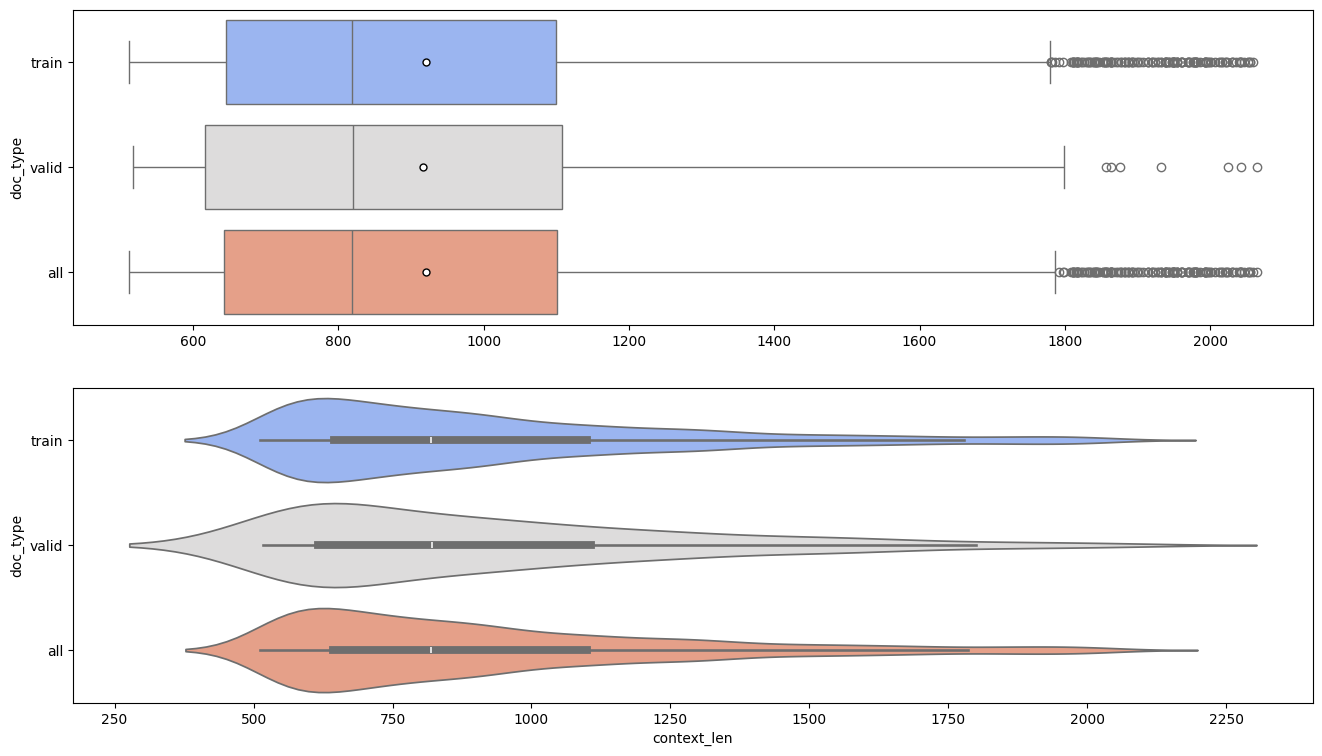

In [51]:
violinbox_len('context_len')

### 2) Question

train data-----------------------------
최댓값:  78.0
최솟값:  8.0
평균:  29.32236842105263

valid data-----------------------------
최댓값:  59.0
최솟값:  9.0
평균:  29.195833333333333

all data(train+valid)------------------
최댓값:  78.0
최솟값:  8.0
평균:  29.315124045801525





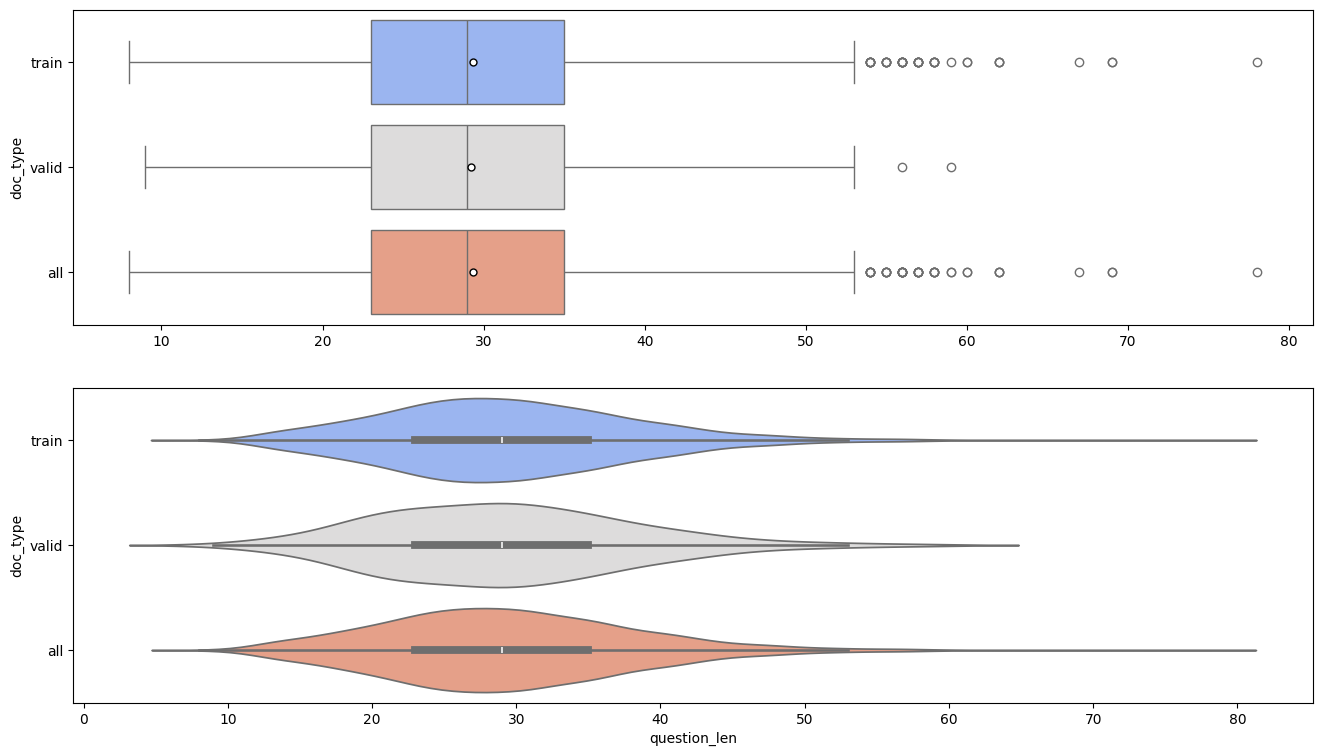

In [52]:
violinbox_len('question_len')

### 3) Answer

train data-----------------------------
최댓값:  83.0
최솟값:  1.0
평균:  6.275050607287449

valid data-----------------------------
최댓값:  64.0
최솟값:  1.0
평균:  6.9125

all data(train+valid)------------------
최댓값:  83.0
최솟값:  1.0
평균:  6.311545801526718





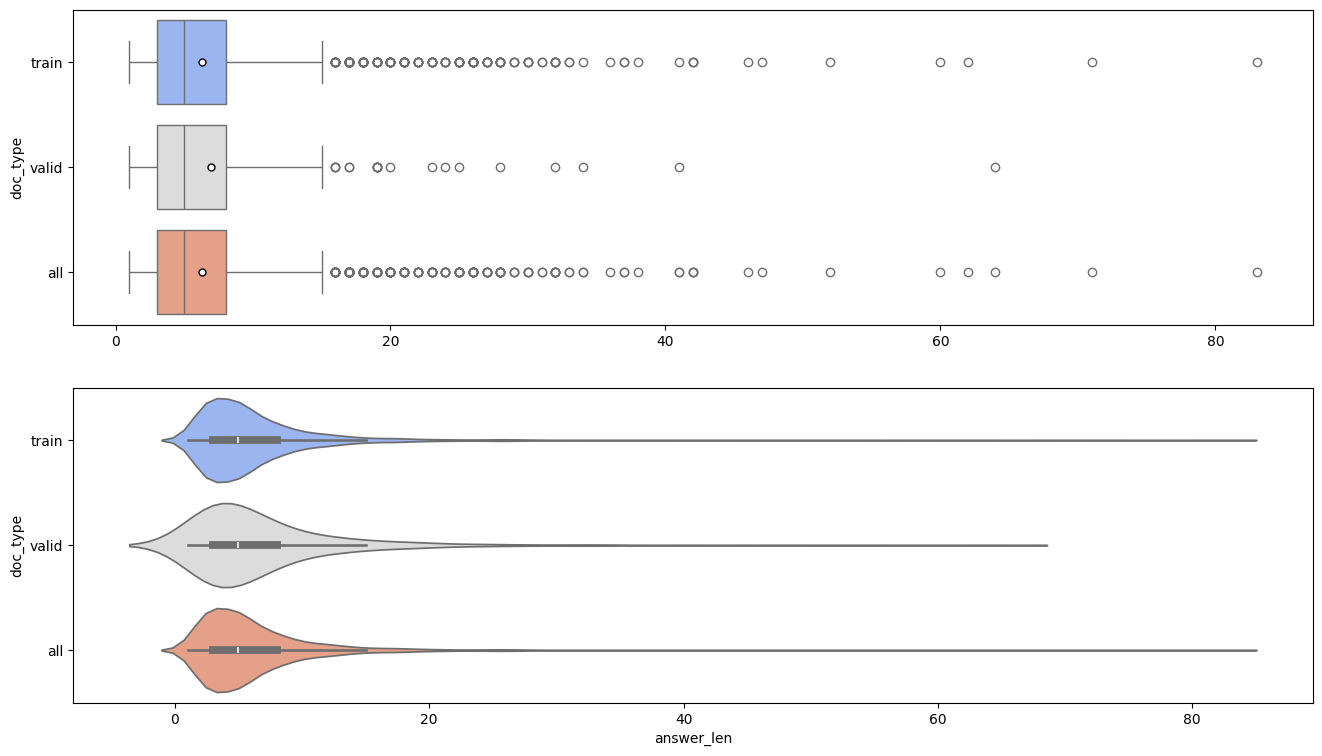

In [53]:
violinbox_len('answer_len')

## Query문에 대해

In [59]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer

In [73]:
query_train_dict = {}
for i in tqdm(range(len(train_df))):
    text = train_df['question'][i]
    split_text = text.split()[-1]
    try:
        query_train_dict[split_text]+=1
    except:
        query_train_dict[split_text] = 1
            
query_train_df = pd.DataFrame(list(query_train_dict.items()), columns=['query','count'])
query_train_df = query_train_df.sort_values('count',ascending=False)
query_train_df = query_train_df.reset_index(drop=True)

  0%|          | 0/3952 [00:00<?, ?it/s]

100%|██████████| 3952/3952 [00:00<00:00, 128077.28it/s]


In [79]:
query_train_df.head(20)

,query,count
0,사람은?,224
1,인물은?,207
2,것은?,187
3,무엇인가?,128
4,누구인가?,125
5,해는?,118
6,곳은?,115
7,이름은?,73
8,어디인가?,72
9,시기는?,44


In [74]:
query_valid_dict = {}
for i in tqdm(range(len(valid_df))):
    text = valid_df['question'][i]
    split_text = text.split()[-1]
    try:
        query_valid_dict[split_text]+=1
    except:
        query_valid_dict[split_text] = 1
            
query_valid_df = pd.DataFrame(list(query_valid_dict.items()), columns=['query','count'])
query_valid_df = query_valid_df.sort_values('count',ascending=False)
query_valid_df = query_valid_df.reset_index(drop=True)

100%|██████████| 240/240 [00:00<00:00, 118177.15it/s]


In [80]:
query_valid_df.head(20)

,query,count
0,것은?,18
1,누구인가?,9
2,사람은?,9
3,인물은?,9
4,무엇인가?,8
5,어디인가?,7
6,곳은?,7
7,이름은?,5
8,방법은?,4
9,해는?,4


In [75]:
query_all_dict = {}
for i in tqdm(range(len(all_df))):
    text = all_df['question'][i]
    split_text = text.split()[-1]
    try:
        query_all_dict[split_text]+=1
    except:
        query_all_dict[split_text] = 1
            
query_all_df = pd.DataFrame(list(query_all_dict.items()), columns=['query','count'])
query_all_df = query_all_df.sort_values('count',ascending=False)
query_all_df = query_all_df.reset_index(drop=True)

100%|██████████| 4192/4192 [00:00<00:00, 127572.28it/s]


In [81]:
query_all_df.head(20)

,query,count
0,사람은?,233
1,인물은?,216
2,것은?,205
3,무엇인가?,136
4,누구인가?,134
5,해는?,122
6,곳은?,122
7,어디인가?,79
8,이름은?,78
9,시기는?,48


In [82]:
def make_query_group(list_name,i,list_str):
    if check_query in list_name:
        query_check.remove(check_query)
        try:
            query_set[list_str] += query_all_df['count'][i]
        except:
            query_set[list_str] = query_all_df['count'][i]
            
query_set = {}
query_check = list(query_all_df['query']) # list로 해야지 순서가 안바뀜..
person = ['사람은?','인물은?','누구인가?','이름은?','누구인가요?','선수는?','자는?','누구였나?','누구였나요?','누구였는가?','상대는?','명칭은?']
place = ['곳은?','어디인가?','장소는?','국가는?','나라는?','도시는?','지역은?','어디인가요?']
date = ['해는?','시기는?','언제인가?','연도는?','년도는?','날짜는?','날은?','언제인가요?','기간은?','년인가?','몇년도인가?','년도인가?','년도였나요?','때는?']
what = ['것은?','무엇인가?','무엇인가요?','무엇이었나요?']
group = ['기관은?','집단은?','단체는?','팀은']
why = ['이유는?','때문인가?']


for i in range(len(query_all_df)):
    check_query = query_all_df['query'][i]
    make_query_group(person,i,'person')
    make_query_group(place,i,'place')
    make_query_group(date,i,'date')
    make_query_group(what,i,'what')
    make_query_group(group,i,'group')
    make_query_group(why,i,'why')
            
        

query_group_df = pd.DataFrame(list(query_set.items()), columns=['query_group','count'])

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

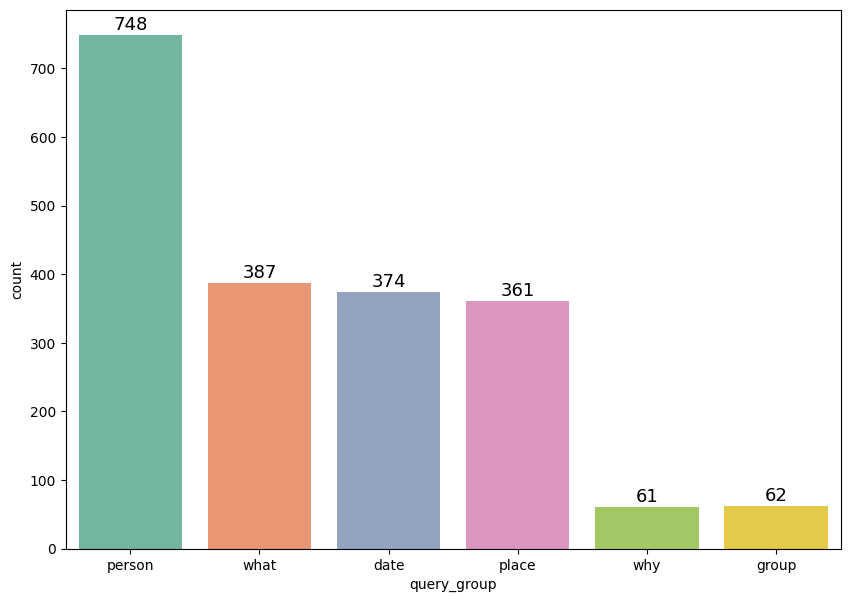

In [84]:
fig = plt.subplots(figsize=(10,7))
ax = sns.barplot(x=query_group_df['query_group'],y=query_group_df['count'],palette = 'Set2');
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 8,int(rect.get_height()),horizontalalignment='center', fontsize = 13)

# 정답의 조사에 대하여

In [85]:
all_ans_df = all_df['answer']
all_ans_df

0                  하원
1            《경영의 실제》
2                  백성
3                  중국
4                  4개
            ...      
4187             제 양왕
4188    '일곱 개의 신전 광장'
4189           미나미 지로
4190         200,000명
4191             공산주의
Name: answer, Length: 4192, dtype: object

In [88]:
from konlpy.tag import *
okt=Okt()

In [89]:
pos_cnt = {}
pos_list = {}
origin_list = {}
pos_se_cnt = {} # 맨앞, 맨뒤
for i in tqdm(range(len(all_ans_df))):
    pos = okt.pos(all_ans_df[i]) # 형태소 분석
    # 전체 개수 추가
    for p in pos:
        try:
            pos_cnt[p[1]] += 1 # 해당 품사의 발생 횟수
            pos_list[p[1]].append(p[0]) # 해당 품사에 속하는 단어를 추가
            origin_list[p[1]].append(all_ans_df[i]) # 원래 문장을 추가
        except:
            pos_cnt[p[1]] = 1
            pos_list[p[1]] = [p[0]]
            origin_list[p[1]] = [all_ans_df[i]]
    
    # 맨 앞, 맨 뒤 추가
    try:
        pos_se_cnt[pos[0][1]]+=1
    except:
        pos_se_cnt[pos[0][1]]=1
    if len(pos)>=2:
        try:
            pos_se_cnt[pos[-1][1]]+=1
        except:
            pos_se_cnt[pos[-1][1]]=1

100%|██████████| 4192/4192 [00:07<00:00, 576.27it/s] 


In [90]:
pos_cnt

{'Noun': 7198,
 'Foreign': 257,
 'Josa': 757,
 'Number': 857,
 'Suffix': 232,
 'Verb': 304,
 'Modifier': 218,
 'Punctuation': 527,
 'Alpha': 177,
 'Adverb': 30,
 'Adjective': 116,
 'Determiner': 41,
 'VerbPrefix': 5,
 'Exclamation': 17,
 'KoreanParticle': 1,
 'Conjunction': 2,
 'Eomi': 3}

- Noun (명사)
- Foreign (외래어)
- Josa (조사)
- Number (수사)
- Suffix (접미사)
- Verb (동사)
- Modifier (수식어) : 명사를 수식하는 수식하는 단어
- Punctuation (구두점)
- Alpha (알파벳)
- Adverb (부사) : ex) 아주, 빠르게
- Adjective (형용사)
- Determiner (관형사) : 명사 앞에 위치하여 명사 범위를 한정하는 단어 ex) "그", "이".
- VerbPrefix (동사접두사) # 동사 앞에 붙어 동사의 의미를 변경하는 접두사
- Exclamation (감탄사)
- KoreanParticle (한국어 어미) ex) ㅋㅋㅋ
- Conjunction (접속사) ex) 그러나, 그리고
- Eomi (어미) : 동사와 형용사의 어간에 붙어 활용 형태를 만드는 요소

In [114]:
# 주석 써서 알아보기

# pos_list['Number']
# pos_list['Modifier']
# pos_list['Punctuation']
# pos_list['Adverb']
# pos_list['Determiner']
# pos_list['VerbPrefix']
# pos_list['Exclamation']
# pos_list['KoreanParticle'] 
# pos_list['Conjunction'] 
pos_list['Eomi'] 

['아서', '한데', '아서']

In [115]:
origin_list['Eomi'] 

['아서 홉우드', '독일의 고전 문헌학자 헤르만 딜스가 이들 철학자의 단편들을 한데 모아 엮은 책의 제목', '아서 레이튼']

In [116]:
pos_cnt # 그냥 다 세기

{'Noun': 7198,
 'Foreign': 257,
 'Josa': 757,
 'Number': 857,
 'Suffix': 232,
 'Verb': 304,
 'Modifier': 218,
 'Punctuation': 527,
 'Alpha': 177,
 'Adverb': 30,
 'Adjective': 116,
 'Determiner': 41,
 'VerbPrefix': 5,
 'Exclamation': 17,
 'KoreanParticle': 1,
 'Conjunction': 2,
 'Eomi': 3}

In [117]:
pos_se_cnt # 중복되는 거는 좀 합치기기

{'Noun': 5016,
 'Foreign': 177,
 'Number': 677,
 'Suffix': 93,
 'Modifier': 100,
 'Punctuation': 288,
 'Alpha': 64,
 'Adverb': 10,
 'Josa': 78,
 'Verb': 87,
 'Adjective': 40,
 'VerbPrefix': 2,
 'Determiner': 15,
 'Exclamation': 7,
 'KoreanParticle': 1,
 'Eomi': 2}

# 증강

- EasyDataAugmentation (EDA)
- AEasierDataAugmentation (AEDA)
- RandomDeletion (RD)
- RandomInsertion (RI)
- SynonymReplacement (SR)
- RandomSwap (RS) 

In [160]:
train_df['question'][:5]

0           대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?
1                     현대적 인사조직관리의 시발점이 된 책은?
2             강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?
3    11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?
4                 명문이 적힌 유물을 구성하는 그릇의 총 개수는?
Name: question, dtype: object

## EasyDataAugmentation (EDA)

In [143]:
from koeda import EDA
augmenter = EDA(morpheme_analyzer = "Okt") # 기본값은 "Okt"

questions = train_df['question'].tolist()
eda_result = augmenter(questions)

eda_result[:5]

['대통령을 포함한 의 행정부 견제권을 갖는 국가 기관은?',
 '현대적 주재 인사조직관리의 시발점이 된 책은?',
 '강희제가 1717년위해쓴 글은 누구를 에 쓰여졌는가?',
 '11~12세기에 제작된 종류존불은 보통 어떤 나라의 특징이 전파되었나요?',
 '명문 글 이 적힌 유물을 구성하는 그릇의 총 개수는?']

EDA란, 동의어 대체, 무작위 삽입, 무작위 교환, 무작위 삭제 등을 진행

- "의"가 추가되어 어색해졌고, 의미가 불명확해졌습니다.
- "주재"라는 단어가 추가되어 원래의 의미와 다르게 해석될 수 있습니다. "주재"는 특정한 의미를 가지고 있기 때문에 혼란을 줄 수 있습니다.
- "1717년위해쓴"에서 띄어쓰기가 잘못되어 의미가 혼란스러워졌습니다. "에 쓰여졌는가?"의 어순도 이상합니다.
- "종류존불"이 잘못 쓰여져 자연스럽지 않습니다.
- "명문 글 이 적힌"에서 "글 이"의 띄어쓰기가 잘못되어 어색해졌습니다.

In [161]:
# # 새로운 데이터셋 생성
# augmented_data = []
# for i in range(len(questions)):
#     # 원본 데이터 추가
#     augmented_data.append({
#         'id': train_df['id'][i],
#         'doc_id': train_df['doc_id'][i],
#         'title': train_df['title'][i],
#         'context': train_df['context'][i],
#         'question': train_df['question'][i],
#         'answer': train_df['answer'][i],
#         'context_len': train_df['context_len'][i],
#         'question_len': train_df['question_len'][i],
#         'answer_len': train_df['answer_len'][i],
#         'answer_start': train_df['answer_start'][i],
#         'doc_type': train_df['doc_type'][i],
#     })
    
#     # EDA로 증강된 데이터 추가
#     augmented_data.append({
#         'id': f"aug-{i}",
#         'doc_id': train_df['doc_id'][i],
#         'title': train_df['title'][i],
#         'context': train_df['context'][i],
#         'question': eda_result[i],
#         'answer': train_df['answer'][i],
#         'context_len': train_df['context_len'][i],
#         'question_len': len(eda_result[i]),
#         'answer_len': train_df['answer_len'][i],
#         'answer_start': train_df['answer_start'][i],
#         'doc_type': train_df['doc_type'][i],
#     })

# # 증강된 데이터프레임 생성
# augmented_df = pd.DataFrame(augmented_data)

# # 결과 출력
# augmented_df.head()

In [162]:
# augmented_df.to_json('augmented_dataset.json', orient='records', force_ascii=False)
# print("증강된 데이터셋이 'augmented_dataset.json' 파일로 저장되었습니다.")

In [163]:
# len(augmented_df)

## AEasierDataAugmentation (AEDA)

In [144]:
from koeda import AEDA
augmenter = AEDA(morpheme_analyzer = "Okt") # 기본값은 "Okt"

questions = train_df['question'].tolist()
aeda_result = augmenter(questions)

aeda_result[:5]

['대통령을 : 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 '현대적 인사조직관리 ? 의 : 시발점이 된 책은?',
 '강희제가 1717년에 쓴 : 글은 . 누구를 : 위해 쓰여졌는가?',
 '11~12세기에 제작된 본존불 . 은 보통 어떤 나라의 특징이 전파되었나요 ? ?',
 '명문이 적힌 유물을 구성하는 그릇 ; 의 : 총 . 개수 , 는?']

## RandomDeletion (RD)

In [149]:
from koeda import RD
augmenter = RD(morpheme_analyzer = "Okt") # 기본값은 "Okt"

questions = train_df['question'].tolist()
rd_result = augmenter(questions)

rd_result[:5]

['대통령을 포함한 미국 행정부 견제권을 갖는 국가 기관은?',
 '현대적 인사조직관리의 시발점 된 책은?',
 '가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?',
 '11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?',
 '명문이 적힌 유물을 구성하는 그릇의 총 는?']

## RandomInsertion (RI)

In [150]:
from koeda import RI
augmenter = RI(morpheme_analyzer = "Okt") # 기본값은 "Okt"

questions = train_df['question'].tolist()
ri_result = augmenter(questions)

ri_result[:5]

['대통령을 포함한 미국의 행정부 견제권을 갖는 국가 포용 기관은?',
 '현대 세대 적 인사조직관리의 시발점이 된 책은?',
 '강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?',
 '11~12세기에 제작된 본존불은 보통 어떤 가공 나라의 특징이 전파되었나요?',
 '접시 명문이 적힌 유물을 구성하는 그릇의 총 개수는?']

## SynonymReplacement (SR)

In [151]:
from koeda import SR
augmenter = SR(morpheme_analyzer = "Okt") # 기본값은 "Okt"

questions = train_df['question'].tolist()
sr_result = augmenter(questions)

sr_result[:5]

['대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관백금?',
 '현대상대 인사조직관리의 시발점이 된 책은?',
 '강희제가 1717년에 쓴 학업은 누구를 위해 쓰여졌는가?',
 '11~12세기에 제작된 본존불은 보통 어떤 나라교의 특징이 전파되었나요?',
 '명문플러스 적힌 유물을 구성하는 그릇의 총 개수는?']

## RandomSwap (RS)

In [152]:
from koeda import RS
augmenter = RS(morpheme_analyzer = "Okt") # 기본값은 "Okt"

questions = train_df['question'].tolist()
rs_result = augmenter(questions)

rs_result[:5]

['을 포함한 미국의대통령행정부 견제권을 갖는 국가 기관은?',
 '현대적 인사조직관리은 시발점이 된 책의?',
 '강희제가 1717년에 쓴 글은 누구위해 를 쓰여졌는가?',
 '11~12세기에 제작된 본존불은 보통 어떤 특징의 나라이 전파되었나요?',
 '명문이 적힌 유물을 구성하는 그릇의 총?개수는']

In [107]:
import pandas as pd
import numpy as np

df = pd.read_csv("/data/ephemeral/home/sungeun/level2-mrc-nlp-13/grouped_df.csv")
df.head()

,title,context,question,answers
0,100원 동전,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,['필리핀 1페소는 원화로 얼마 정도 하는가?'],"[{'answer_start': array([194]), 'text': array(..."
1,10년 전쟁,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...",['크리올 엘리트들이 스페인 의회에게 요청한 점은 모두 몇 개인가?'],"[{'answer_start': array([569]), 'text': array(..."
2,1577년 대혜성,"1577년 11월 13일, 튀코 브라헤는 해가 지기 직전 이 혜성을 보았다는 기록을...",['행성들이 타원을 그리며 태양 주위를 돈다는 사실을 정리한 이론은?'],"[{'answer_start': array([348]), 'text': array(..."
3,1701년 왕위계승법,1701년 당시 잉글랜드의 왕을 겸하고 있던 스코틀랜드 왕인 윌리엄 3세에게는 대를...,['윌리엄 3세가 2개 지역의 왕이었던 해는?'],"[{'answer_start': array([0]), 'text': array(['..."
4,1875년 페이지 법,미국으로 온 최초의 중국인 이민자들은 압도적으로 남성이 다수였다. 그들 대다수가 캘...,"['미국으로 이민 온 사람들은 누구로부터 돈을 차용할 수 있었나?', '남성 노동자...","[{'answer_start': array([271]), 'text': array(..."


In [142]:
df['answers'][0]

"[{'answer_start': array([194]), 'text': array(['20원'], dtype=object)}]"

In [84]:
df[:6]

,title,context,question,answers,question_length,question_count
0,100원 동전,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,['필리핀 1페소는 원화로 얼마 정도 하는가?'],"[{'answer_start': array([194]), 'text': array(...",27,1
1,10년 전쟁,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...",['크리올 엘리트들이 스페인 의회에게 요청한 점은 모두 몇 개인가?'],"[{'answer_start': array([569]), 'text': array(...",39,1
2,1577년 대혜성,"1577년 11월 13일, 튀코 브라헤는 해가 지기 직전 이 혜성을 보았다는 기록을...",['행성들이 타원을 그리며 태양 주위를 돈다는 사실을 정리한 이론은?'],"[{'answer_start': array([348]), 'text': array(...",40,1
3,1701년 왕위계승법,1701년 당시 잉글랜드의 왕을 겸하고 있던 스코틀랜드 왕인 윌리엄 3세에게는 대를...,['윌리엄 3세가 2개 지역의 왕이었던 해는?'],"[{'answer_start': array([0]), 'text': array(['...",27,1
4,1875년 페이지 법,미국으로 온 최초의 중국인 이민자들은 압도적으로 남성이 다수였다. 그들 대다수가 캘...,"['미국으로 이민 온 사람들은 누구로부터 돈을 차용할 수 있었나?', '남성 노동자...","[{'answer_start': array([271]), 'text': array(...",79,1
5,18세기 문학,17세기에 완성의 영역에 도달한 고전주의 문학 전통은 18세기에 계승되어 내려온다....,['경험주의를 배운 작가들을 부르는 명칭은 무엇인가요?'],"[{'answer_start': array([727]), 'text': array(...",32,1


In [63]:
df.head(7)

,title,context,question,answers
0,100원 동전,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,['필리핀 1페소는 원화로 얼마 정도 하는가?'],"[{'answer_start': array([194]), 'text': array(..."
1,10년 전쟁,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...",['크리올 엘리트들이 스페인 의회에게 요청한 점은 모두 몇 개인가?'],"[{'answer_start': array([569]), 'text': array(..."
2,1577년 대혜성,"1577년 11월 13일, 튀코 브라헤는 해가 지기 직전 이 혜성을 보았다는 기록을...",['행성들이 타원을 그리며 태양 주위를 돈다는 사실을 정리한 이론은?'],"[{'answer_start': array([348]), 'text': array(..."
3,1701년 왕위계승법,1701년 당시 잉글랜드의 왕을 겸하고 있던 스코틀랜드 왕인 윌리엄 3세에게는 대를...,['윌리엄 3세가 2개 지역의 왕이었던 해는?'],"[{'answer_start': array([0]), 'text': array(['..."
4,1875년 페이지 법,미국으로 온 최초의 중국인 이민자들은 압도적으로 남성이 다수였다. 그들 대다수가 캘...,"['미국으로 이민 온 사람들은 누구로부터 돈을 차용할 수 있었나?', '남성 노동자...","[{'answer_start': array([271]), 'text': array(..."
5,18세기 문학,17세기에 완성의 영역에 도달한 고전주의 문학 전통은 18세기에 계승되어 내려온다....,['경험주의를 배운 작가들을 부르는 명칭은 무엇인가요?'],"[{'answer_start': array([727]), 'text': array(..."
6,192고지 사건,일등병 로버트 M 스토비는 분대에 함께 있었지만 이 일에 가담하지는 않았다. 작전을...,['토머스는 어떤 사건으로 인해 1년간의 보호 관찰을 받았나?'],"[{'answer_start': array([465]), 'text': array(..."


In [64]:
len(df)

3341

In [87]:
df['question']

0                             ['필리핀 1페소는 원화로 얼마 정도 하는가?']
1                 ['크리올 엘리트들이 스페인 의회에게 요청한 점은 모두 몇 개인가?']
2                ['행성들이 타원을 그리며 태양 주위를 돈다는 사실을 정리한 이론은?']
3                             ['윌리엄 3세가 2개 지역의 왕이었던 해는?']
4       ['미국으로 이민 온 사람들은 누구로부터 돈을 차용할 수 있었나?', '남성 노동자...
                              ...                        
3336                     ['인도 철학은 나스티카와 무엇으로 분리되어 있었나요?']
3337                   ['힌두어를 인도 공용어로 지정하는 것에 반대하는 민족은?']
3338    ['남군의 소장들 중 힐이 가장 뛰어난 사람이라고 언급한 인물은?', '힐이 사관학...
3339                               ['기영재를 살해한 인물은 누구인가?']
3340                         ['구급차로 부상자가 이동하는 것을 막은 것은?']
Name: question, Length: 3341, dtype: object

In [119]:
from collections import Counter

new_df = []
for q in df['question']:
    q = q.split(',')
    c = len(q)
    new_df.append(c)

# 질문 개수의 통계 계산
count_statistics = Counter(new_df)

# 결과 출력
print("질문 개수별 통계:")
for count, freq in count_statistics.items():
    print(f"{count}개 질문: {freq}회")


질문 개수별 통계:
1개 질문: 2695회
2개 질문: 590회
3개 질문: 47회
4개 질문: 8회
5개 질문: 1회


In [139]:
import pandas as pd
from collections import Counter

# new_df 생성 (질문 개수 계산)
new_counts = []
for q in df['question']:
    q = q.split(',')
    c = len(q)
    new_counts.append(c)

# # new_counts를 DataFrame으로 변환
df = df.drop(columns=['question_count'], axis=1)
new_df = pd.DataFrame(new_counts, columns=['question_count'])

# df와 new_df를 옆으로 합치기
result_df = pd.concat([df, new_df], axis=1)

# 결과 출력
result_df

,title,context,question,answers,question_count
0,100원 동전,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,['필리핀 1페소는 원화로 얼마 정도 하는가?'],"[{'answer_start': array([194]), 'text': array(...",1
1,10년 전쟁,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...",['크리올 엘리트들이 스페인 의회에게 요청한 점은 모두 몇 개인가?'],"[{'answer_start': array([569]), 'text': array(...",1
2,1577년 대혜성,"1577년 11월 13일, 튀코 브라헤는 해가 지기 직전 이 혜성을 보았다는 기록을...",['행성들이 타원을 그리며 태양 주위를 돈다는 사실을 정리한 이론은?'],"[{'answer_start': array([348]), 'text': array(...",1
3,1701년 왕위계승법,1701년 당시 잉글랜드의 왕을 겸하고 있던 스코틀랜드 왕인 윌리엄 3세에게는 대를...,['윌리엄 3세가 2개 지역의 왕이었던 해는?'],"[{'answer_start': array([0]), 'text': array(['...",1
4,1875년 페이지 법,미국으로 온 최초의 중국인 이민자들은 압도적으로 남성이 다수였다. 그들 대다수가 캘...,"['미국으로 이민 온 사람들은 누구로부터 돈을 차용할 수 있었나?', '남성 노동자...","[{'answer_start': array([271]), 'text': array(...",2
...,...,...,...,...,...
3336,힌두교의 역사,힌두교는 인도 아대륙에서 기원한 다양한 종교 전통들을 포괄하는 낱말이다. 역사적으로...,['인도 철학은 나스티카와 무엇으로 분리되어 있었나요?'],"[{'answer_start': array([245]), 'text': array(...",1
3337,힌디어,인도유럽어족 인도이란어파 에 분류된다.\n\n네팔에서 말한 네팔어 및 인도 국내와 ...,['힌두어를 인도 공용어로 지정하는 것에 반대하는 민족은?'],"[{'answer_start': array([737]), 'text': array(...",1
3338,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ...","['남군의 소장들 중 힐이 가장 뛰어난 사람이라고 언급한 인물은?', '힐이 사관학...","[{'answer_start': array([825]), 'text': array(...",2
3339,힐러 (드라마),"1980년대 언론의 자유가 억압된 독재 정권 시절 김문식, 최명희, 기영재, 서준석...",['기영재를 살해한 인물은 누구인가?'],"[{'answer_start': array([1028]), 'text': array...",1


In [140]:
single_question = result_df[result_df['question_count'] == 1]
single_question

,title,context,question,answers,question_count
0,100원 동전,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,['필리핀 1페소는 원화로 얼마 정도 하는가?'],"[{'answer_start': array([194]), 'text': array(...",1
1,10년 전쟁,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...",['크리올 엘리트들이 스페인 의회에게 요청한 점은 모두 몇 개인가?'],"[{'answer_start': array([569]), 'text': array(...",1
2,1577년 대혜성,"1577년 11월 13일, 튀코 브라헤는 해가 지기 직전 이 혜성을 보았다는 기록을...",['행성들이 타원을 그리며 태양 주위를 돈다는 사실을 정리한 이론은?'],"[{'answer_start': array([348]), 'text': array(...",1
3,1701년 왕위계승법,1701년 당시 잉글랜드의 왕을 겸하고 있던 스코틀랜드 왕인 윌리엄 3세에게는 대를...,['윌리엄 3세가 2개 지역의 왕이었던 해는?'],"[{'answer_start': array([0]), 'text': array(['...",1
5,18세기 문학,17세기에 완성의 영역에 도달한 고전주의 문학 전통은 18세기에 계승되어 내려온다....,['경험주의를 배운 작가들을 부르는 명칭은 무엇인가요?'],"[{'answer_start': array([727]), 'text': array(...",1
...,...,...,...,...,...
3335,힌두교 종파,힌두교의 종파는 주로 숭배 대상인 주신(主神)에 따라 나뉜다. 힌두교에는 수많은 종...,['힌두교에서 한 철학적 분파의 스승을 뜻하는 단어는 무엇인가요?'],"[{'answer_start': array([452]), 'text': array(...",1
3336,힌두교의 역사,힌두교는 인도 아대륙에서 기원한 다양한 종교 전통들을 포괄하는 낱말이다. 역사적으로...,['인도 철학은 나스티카와 무엇으로 분리되어 있었나요?'],"[{'answer_start': array([245]), 'text': array(...",1
3337,힌디어,인도유럽어족 인도이란어파 에 분류된다.\n\n네팔에서 말한 네팔어 및 인도 국내와 ...,['힌두어를 인도 공용어로 지정하는 것에 반대하는 민족은?'],"[{'answer_start': array([737]), 'text': array(...",1
3339,힐러 (드라마),"1980년대 언론의 자유가 억압된 독재 정권 시절 김문식, 최명희, 기영재, 서준석...",['기영재를 살해한 인물은 누구인가?'],"[{'answer_start': array([1028]), 'text': array...",1


In [141]:
# CSV 파일로 저장
csv_file = 'single_question_data.csv'
single_question.to_csv(csv_file, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 '{csv_file}'로 저장되었습니다.")

CSV 파일이 'single_question_data.csv'로 저장되었습니다.


In [144]:
import pandas as pd
from datasets import load_from_disk

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [148]:
mrc_datasets = load_from_disk('/data/ephemeral/home/sungeun/level2-mrc-nlp-13/data/train_dataset')
train = mrc_datasets['train']
train = train.to_pandas()

In [149]:
train.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548


In [ ]:
# 원본 train + 역변역
translated = pd.read_csv('')

# augmented_df.to_json('augmented_dataset.json', orient='records', force_ascii=False)
# print("증강된 데이터셋이 'augmented_dataset.json' 파일로 저장되었습니다.")


# 여기서부터!

In [199]:
# 원본 train + lm+qg
lm_qg = pd.read_csv('/data/ephemeral/home/sungeun/LMQG/combined_context_qa.csv')
lm_qg.head()

,context,medium,question,answers
0,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...","한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷한 가치는?","{'answer_start': 205, 'text': '2개'}"
1,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...",100원 동전 대신 외국 동전을 악용한 사례는 무엇인가?,"{'answer_start': 339, 'text': '필리핀의 1페소 동전이 나오..."
2,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...",일본의 500엔 동전처럼 자동 판매기의 사용을 금지시켜야 할 필요가 있다는 여론이 ...,"{'answer_start': 393, 'text': '위변조'}"
3,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...","용 증가로 이어졌다. 신기술과 농경 기술은 많은 수의 노예를 불필요하게 만들었으며,...",신기술과 농경 기술이 많은 수의 노예를 불필요하게 만든 이유는?,"{'answer_start': 201, 'text': '용'}"
4,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...","용 증가로 이어졌다. 신기술과 농경 기술은 많은 수의 노예를 불필요하게 만들었으며,...",신기술과 무엇이 많은 수의 노예를 불필요하게 만들었는가?,"{'answer_start': 218, 'text': '농경'}"


In [200]:
import ast

lm_qg = lm_qg['answers']

new_answers = []  # 새로운 리스트 초기화

for i in range(len(lm_qg)):
    # 각 lm_qg[i]는 문자열이므로 ast.literal_eval을 사용하여 딕셔너리로 변환
    answer = ast.literal_eval(lm_qg[i])
    
    # answer_start와 text 값을 대괄호로 묶어 새로운 딕셔너리 생성
    new_answer = {
        'answer_start': [answer['answer_start']],  # 대괄호로 묶기
        'text': [answer['text']]  # 대괄호로 묶기
    }
    
    new_answers.append(new_answer)  # 새로운 리스트에 추가

# 결과 출력
for answer in new_answers:
    print(answer)


{'answer_start': [205], 'text': ['2개']}
{'answer_start': [339], 'text': ['필리핀의 1페소 동전이 나오는 등']}
{'answer_start': [393], 'text': ['위변조']}
{'answer_start': [201], 'text': ['용']}
{'answer_start': [218], 'text': ['농경']}
{'answer_start': [263], 'text': ['1857년']}
{'answer_start': [154], 'text': ['노예제도']}
{'answer_start': [425], 'text': ['중국']}
{'answer_start': [448], 'text': ['1870년대']}
{'answer_start': [61], 'text': ['스페인']}
{'answer_start': [589], 'text': ['1867년']}
{'answer_start': [358], 'text': ['행성운동법칙']}
{'answer_start': [358], 'text': ['행성운동법칙']}
{'answer_start': [15], 'text': ['튀코']}
{'answer_start': [689], 'text': ['세 배']}
{'answer_start': [714], 'text': ['벤']}
{'answer_start': [781], 'text': ['밤하']}
{'answer_start': [9], 'text': ['잉글랜드']}
{'answer_start': [344], 'text': ['국교회']}
{'answer_start': [351], 'text': ['중국인 남성 이민자']}
{'answer_start': [452], 'text': ['중국인 여성']}
{'answer_start': [11], 'text': ['중국']}
{'answer_start': [351], 'text': ['중국인 남성']}
{'answer_start': [766], 'text

In [201]:
lm_qg = pd.read_csv('/data/ephemeral/home/sungeun/LMQG/combined_context_qa.csv')
lm_qg.head()

,context,medium,question,answers
0,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...","한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷한 가치는?","{'answer_start': 205, 'text': '2개'}"
1,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...",100원 동전 대신 외국 동전을 악용한 사례는 무엇인가?,"{'answer_start': 339, 'text': '필리핀의 1페소 동전이 나오..."
2,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...",일본의 500엔 동전처럼 자동 판매기의 사용을 금지시켜야 할 필요가 있다는 여론이 ...,"{'answer_start': 393, 'text': '위변조'}"
3,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...","용 증가로 이어졌다. 신기술과 농경 기술은 많은 수의 노예를 불필요하게 만들었으며,...",신기술과 농경 기술이 많은 수의 노예를 불필요하게 만든 이유는?,"{'answer_start': 201, 'text': '용'}"
4,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...","용 증가로 이어졌다. 신기술과 농경 기술은 많은 수의 노예를 불필요하게 만들었으며,...",신기술과 무엇이 많은 수의 노예를 불필요하게 만들었는가?,"{'answer_start': 218, 'text': '농경'}"


In [202]:
df = lm_qg

In [203]:
df.drop(columns=['answers'], inplace=True)

In [204]:
df['answers'] = new_answers

In [205]:
df

,context,medium,question,answers
0,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...","한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷한 가치는?","{'answer_start': [205], 'text': ['2개']}"
1,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...",100원 동전 대신 외국 동전을 악용한 사례는 무엇인가?,"{'answer_start': [339], 'text': ['필리핀의 1페소 동전이..."
2,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷하고 약 20원(10원 동...",일본의 500엔 동전처럼 자동 판매기의 사용을 금지시켜야 할 필요가 있다는 여론이 ...,"{'answer_start': [393], 'text': ['위변조']}"
3,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...","용 증가로 이어졌다. 신기술과 농경 기술은 많은 수의 노예를 불필요하게 만들었으며,...",신기술과 농경 기술이 많은 수의 노예를 불필요하게 만든 이유는?,"{'answer_start': [201], 'text': ['용']}"
4,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...","용 증가로 이어졌다. 신기술과 농경 기술은 많은 수의 노예를 불필요하게 만들었으며,...",신기술과 무엇이 많은 수의 노예를 불필요하게 만들었는가?,"{'answer_start': [218], 'text': ['농경']}"
...,...,...,...,...
17780,이 때문에 수천명의 관중들이 입석으로 향하는 좁은 터널에 몰리게 되었다. 하지만 경...,"로 입장하도록 안내했지만, 이 날은 그리 하지 않았고, 그 이유는 여전히 제대로 해...",관중들은 펜스에 있는 어떤 문을 억지로 열었는가?,"{'answer_start': [415], 'text': ['작은 문을 억지로']}"
17781,이 때문에 수천명의 관중들이 입석으로 향하는 좁은 터널에 몰리게 되었다. 하지만 경...,"로 입장하도록 안내했지만, 이 날은 그리 하지 않았고, 그 이유는 여전히 제대로 해...",웨스트 스탠드의 관중들이 뒷사람이 당겨주어 무사한 사람은?,"{'answer_start': [448], 'text': ['리핑 레인']}"
17782,이 때문에 수천명의 관중들이 입석으로 향하는 좁은 터널에 몰리게 되었다. 하지만 경...,"로 입장하도록 안내했지만, 이 날은 그리 하지 않았고, 그 이유는 여전히 제대로 해...",관중석은 어느 곳에 아수라장이 되었는가?,"{'answer_start': [554], 'text': ['순식간에 아수라장이']}"
17783,이 때문에 수천명의 관중들이 입석으로 향하는 좁은 터널에 몰리게 되었다. 하지만 경...,"로 입장하도록 안내했지만, 이 날은 그리 하지 않았고, 그 이유는 여전히 제대로 해...",관중석은 경찰과 직원과 어떤 대원만으로 사태를 처리할 수 없었는가?,"{'answer_start': [578], 'text': ['구급']}"


In [206]:
df.drop(columns=['medium'], inplace=True)

In [207]:
df

,context,question,answers
0,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,"한민국의 100원 동전과 소재, 무게, 지름, 두께가 비슷한 가치는?","{'answer_start': [205], 'text': ['2개']}"
1,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,100원 동전 대신 외국 동전을 악용한 사례는 무엇인가?,"{'answer_start': [339], 'text': ['필리핀의 1페소 동전이..."
2,과거 필리핀의 1페소 동전이 대한민국 각지의 자동 판매기에서 100원 동전으로 둔갑...,일본의 500엔 동전처럼 자동 판매기의 사용을 금지시켜야 할 필요가 있다는 여론이 ...,"{'answer_start': [393], 'text': ['위변조']}"
3,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...",신기술과 농경 기술이 많은 수의 노예를 불필요하게 만든 이유는?,"{'answer_start': [201], 'text': ['용']}"
4,"1850년대와 1860년대를 통해, 쿠바의 농장주와 사업가들은 식민지를 통치하는 근...",신기술과 무엇이 많은 수의 노예를 불필요하게 만들었는가?,"{'answer_start': [218], 'text': ['농경']}"
...,...,...,...
17780,이 때문에 수천명의 관중들이 입석으로 향하는 좁은 터널에 몰리게 되었다. 하지만 경...,관중들은 펜스에 있는 어떤 문을 억지로 열었는가?,"{'answer_start': [415], 'text': ['작은 문을 억지로']}"
17781,이 때문에 수천명의 관중들이 입석으로 향하는 좁은 터널에 몰리게 되었다. 하지만 경...,웨스트 스탠드의 관중들이 뒷사람이 당겨주어 무사한 사람은?,"{'answer_start': [448], 'text': ['리핑 레인']}"
17782,이 때문에 수천명의 관중들이 입석으로 향하는 좁은 터널에 몰리게 되었다. 하지만 경...,관중석은 어느 곳에 아수라장이 되었는가?,"{'answer_start': [554], 'text': ['순식간에 아수라장이']}"
17783,이 때문에 수천명의 관중들이 입석으로 향하는 좁은 터널에 몰리게 되었다. 하지만 경...,관중석은 경찰과 직원과 어떤 대원만으로 사태를 처리할 수 없었는가?,"{'answer_start': [578], 'text': ['구급']}"


In [208]:
# CSV 파일로 저장
csv_file = 'final_lmqg.csv'
df.to_csv(csv_file, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 '{csv_file}'로 저장되었습니다.")

CSV 파일이 'final_lmqg.csv'로 저장되었습니다.
